<a href="https://colab.research.google.com/github/hbhb0311/Visualization/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data load

In [ ]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함 (코랩)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline

In [2]:
abalone = pd.read_csv('/content/drive/MyDrive/멋쟁이사자처럼/dataset/abalone.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# 2. Data Cleaning

Age 변수 추가하고 Rings 변수 삭제

In [4]:
abalone['Age'] = abalone['Rings'] + 1.5

In [5]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


## 2-1. Agegroup 변수 추가(5년 기준 그룹화)

In [6]:
def agegroup(age):
  if age < 5:
    return 5
  elif age < 10:
    return 10
  elif age < 15:
    return 15
  elif age < 20:
    return 20
  elif age < 25:
    return 25
  elif age < 30:
    return 30
  else:
    return 35

In [7]:
abalone['Agegroup'] = abalone['Age'].transform(agegroup)
abalone = abalone.drop('Rings', axis = 1)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Agegroup
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,20
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,10
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,15
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,15
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,10


In [8]:
agecnt = abalone.groupby('Agegroup').count()['Length']
agecnt

Agegroup
5       17
10    1390
15    2280
20     396
25      87
30       6
35       1
Name: Length, dtype: int64

# 3. Visualization - plotly, seaborn

## 3-1. Agegroup별 개수 확인

In [9]:
fig = px.bar(x = agecnt.index, y = agecnt.values, text = agecnt.values, color_continuous_scale='purples', 
       color = agecnt.values, labels={'x':'나이 (5년)', 'y': '개수'})
fig.update_traces(textposition='outside')
fig.update_layout(title_text='전복 나이별 개수')

15살 그룹(10~15세)에 데이터의 개수가 가장 많음

## 3-2. 성별별 나이 확인

In [10]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=abalone[abalone['Sex'] == 'M']['Age'], name='수컷',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=abalone[abalone['Sex'] == 'F']['Age'], name = '암컷',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=abalone[abalone['Sex'] == 'I']['Age'], name = '유아',
                marker_color = 'royalblue'))
fig.update_layout(
    yaxis_title='나이',
    title = '전복 암, 수, 유아별 나이')
fig.show()

유아의 나이만 낮은 편, 성별에 따른 차이는 거의 없어 보임

## 3-3. 전복 나이와 상관성 있는 데이터 파악

In [11]:
fig = px.scatter_matrix(abalone, color = 'Agegroup', width=1300, height=1300, color_continuous_scale='balance')
fig.show()

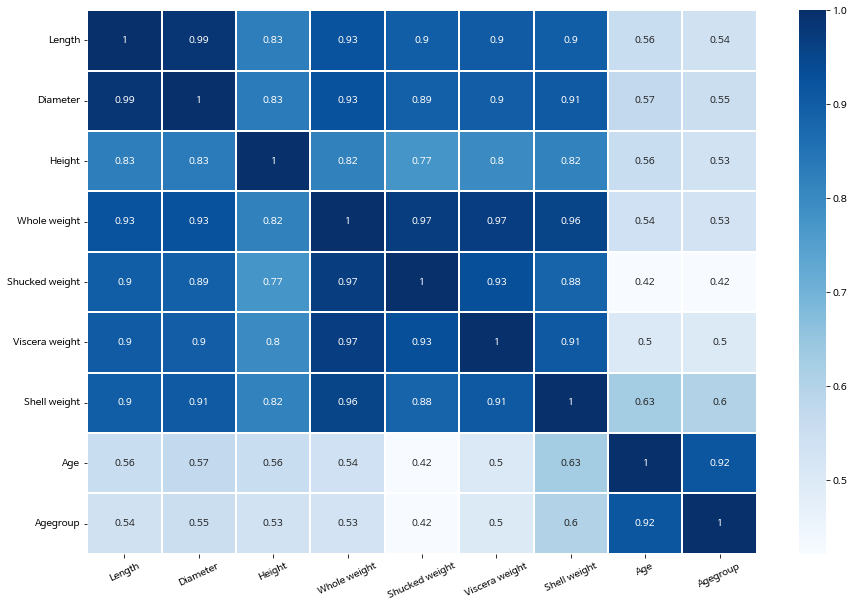

In [12]:
plt.figure(figsize = (15, 10))
heatmap = sns.heatmap(abalone.corr(), annot = True, cmap = 'Blues', linewidths=1)
plt.xticks(rotation = 25)
plt.show()

Shell weight, Diameter 변수가 Age 변수와 상관이 가장 높음

# 4. Age 변수와 상관이 높은 변수 2개(Shell weight, Diameter) 시각화

## 4-1. Barplot

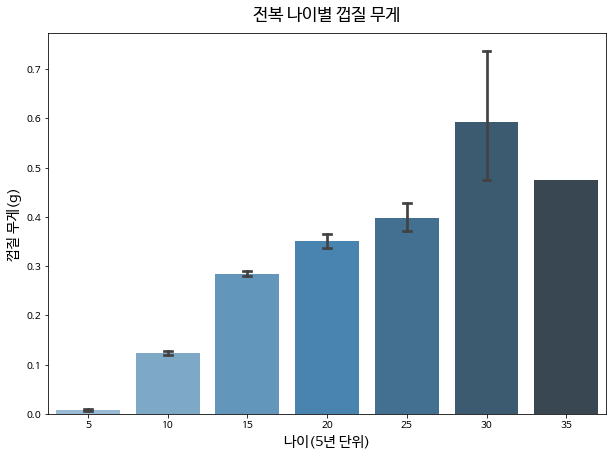

In [13]:
plt.figure(figsize = (10,7))
fig = sns.barplot('Agegroup', 'Shell weight', data = abalone, capsize = .1, palette='Blues_d')

plt.xlabel('나이(5년 단위)', fontsize = 14)
plt.ylabel('껍질 무게(g)', fontsize = 14)
plt.title('전복 나이별 껍질 무게', fontsize = 17, y = 1.02)
plt.show()

나이가 많아질수록 껍질 무게가 무거워지는 경향을 보임

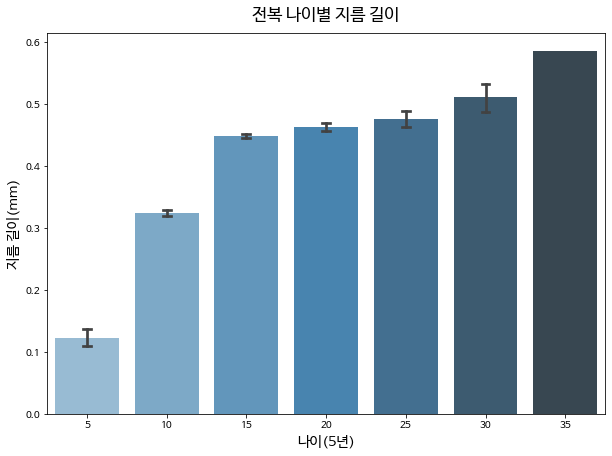

In [14]:
plt.figure(figsize = (10,7))
fig = sns.barplot('Agegroup', 'Diameter', data = abalone, capsize = .1, palette='Blues_d')

plt.xlabel('나이(5년)', fontsize = 14)
plt.ylabel('지름 길이(mm)', fontsize = 14)
plt.title('전복 나이별 지름 길이', fontsize = 17, y = 1.02)
plt.show()

나이가 많아질수록 지름길이가 길어지는 경향을 보임

## 4-2. Jointplot

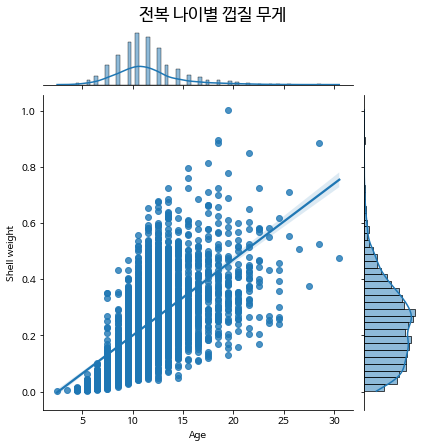

In [15]:
joint = sns.jointplot('Age', 'Shell weight', data = abalone, kind = 'reg') 
plt.xlabel('나이(5년 단위)', fontsize = 14)
plt.ylabel('껍질 무게(g)', fontsize = 14)
joint.fig.suptitle('전복 나이별 껍질 무게', fontsize = 17, y=1.03)
plt.show()

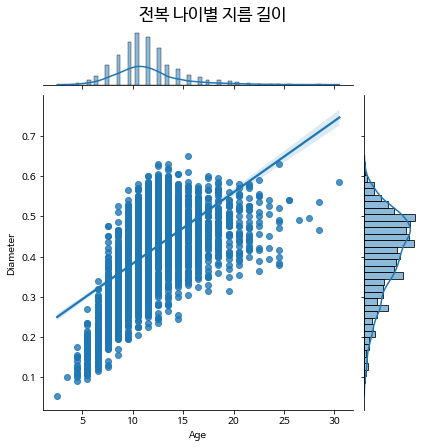

In [16]:
joint = sns.jointplot('Age', 'Diameter', data = abalone, kind = 'reg') 
plt.xlabel('나이(5년 단위)', fontsize = 14)
plt.ylabel('지름(mm)', fontsize = 14)
joint.fig.suptitle('전복 나이별 지름 길이', fontsize = 17, y=1.03)
plt.show()

# 5. KNN classification

## 5-1. Agegroup2 변수 생성(그룹의 수 줄이기 위해)

In [18]:
def agegroup2(age):
  if age < 10:
    return 0
  elif age <20:
    return 10
  elif age <30:
    return 20
  else:
    return 30

In [19]:
abalone['Agegroup2'] = abalone['Age'].transform(agegroup2)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Agegroup,Agegroup2
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,20,10
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,10,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,15,10
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,15,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,10,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

mesh_size = .02
margin = 0.25


# 훈련 데이터와 테스트 데이터로 나누어줌(X,y를 array로 바꾸어주기 위해 to_numpy 함수 사용)
X, y = abalone.iloc[:, [2,7]].to_numpy(), abalone.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# 데이터 표준화해주기
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_std = np.vstack((X_train_std, X_test_std))


# mesh grid 만들어주기
x_min, x_max = X_std[:, 0].min() - margin, X_std[:, 0].max() + margin
y_min, y_max = X_std[:, 1].min() - margin, X_std[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)


# KNN 모델 구축
clf = KNeighborsClassifier(4)
clf.fit(X_train_std, y_train)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# 각 마커 설정
trace_specs = [
    [X_train_std, y_train, 0, 'Train', 'square'],
    [X_train_std, y_train, 10, 'Train', 'circle'],
    [X_train_std, y_train, 20, 'Train', 'star'],
    [X_train_std, y_train, 30, 'Train', 'diamond'],
    [X_test_std, y_test, 0, 'Test', 'square-dot'],
    [X_test_std, y_test, 10, 'Test', 'circle-dot'],
    [X_test_std, y_test, 20, 'Test', 'star-dot'],
    [X_test_std, y_test, 30, 'Test', 'diamond-dot']
]


# 그래프 그리기
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])


# 마커 설정 하기
fig.update_traces(
    marker_size=15, marker_line_width=1.5,
    marker_color="lightyellow"
)


# 그래프 속성 정해주기
fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)


# 범례, 제목 설정
fig.update_layout(
    legend_orientation='h',
    title='껍질 무게와 지름으로 KNN Classification'
)

fig.show()